# <03_EDA2>

* 데이터 전처리
* EDA
* 분석 내용
* 인사이트

In [1]:
import pandas as pd

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [58]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

plt.rc("font", family="Malgun Gothic")
sns.set_theme(font="Malgun Gothic", 
              rc={"axes.unicode_minus":False}, style='darkgrid') # 음수 부호 깨짐 방지, 그래프 배경색

## 3-4.연관 규칙 분석

In [2]:
customer = pd.read_csv('data/customer.csv', index_col='구매번호')
customer = customer.applymap(lambda x: 1 if x > 1 else x)
customer.head(2)

,Beer set,Couple set A,Couple set B,Family set,Single set,뉴욕핫도그,미닛메이드 오렌지,미닛메이드 포도,뱅쇼(G),사케,...,컵와인 핑크모스카토,코카콜라,클라우드(캔),토레타,프레즐,하겐다즈 딸기,하겐다즈 바닐라,하겐다즈 쵸코,핫초코,허브티
구매번호,,,,,,,,,,,,,,,,,,,,,
1019-1-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019-1-10,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Apriori 알고리즘을 사용하여 빈발 항목 집합 찾기
frequent_itemset = apriori(customer,
                           min_support=0.005, # 최소 지지도 (이 값보다 낮은 지지도를 갖는 품목 집합은 제외)
                           max_len=3, # 품목 집합 최대 개수
                           use_colnames=True) # 품목 집합을 컬럼 이름으로 지정

frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support', ascending=False, inplace=True)

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [4]:
frequent_itemset.head()

,support,itemsets,length
14,0.204547,(츄러스),1
17,0.203478,(캬라멜팝콘(M)),1
6,0.189520,(생수),1
21,0.074713,(코카콜라),1
16,0.070277,(캬라멜 팝콘(L)),1


In [5]:
# 연관 규칙 생성
rules = association_rules(frequent_itemset,
                          metric='confidence',
                          min_threshold=0.005) # 신뢰도 0.005 이상인 연관 규칙만 선택

In [6]:
rules2 = rules.drop(columns=['antecedent support', 'consequent support', 'conviction', 'zhangs_metric'], axis=1).round(3)
rules2

,antecedents,consequents,support,confidence,lift,leverage
0,(캬라멜팝콘(M)),(생수),0.019,0.095,0.504,-0.019
1,(생수),(캬라멜팝콘(M)),0.019,0.103,0.504,-0.019
2,(캬라멜팝콘(M)),(츄러스),0.018,0.087,0.424,-0.024
3,(츄러스),(캬라멜팝콘(M)),0.018,0.086,0.424,-0.024
4,(츄러스),(생수),0.016,0.080,0.422,-0.022
5,(생수),(츄러스),0.016,0.086,0.422,-0.022
6,(코카콜라),(캬라멜팝콘(M)),0.011,0.150,0.737,-0.004
7,(캬라멜팝콘(M)),(코카콜라),0.011,0.055,0.737,-0.004
8,(코카콜라),(츄러스),0.008,0.107,0.523,-0.007
9,(츄러스),(코카콜라),0.008,0.039,0.523,-0.007


In [7]:
rules2_dup = rules2.loc[[0, 1, 6, 7, 12, 13, 14, 15]] # X->Y == Y->X
rules2_dup

# 세트메뉴를 다시 구성할 필요가 있다

,antecedents,consequents,support,confidence,lift,leverage
0,(캬라멜팝콘(M)),(생수),0.019,0.095,0.504,-0.019
1,(생수),(캬라멜팝콘(M)),0.019,0.103,0.504,-0.019
6,(코카콜라),(캬라멜팝콘(M)),0.011,0.150,0.737,-0.004
7,(캬라멜팝콘(M)),(코카콜라),0.011,0.055,0.737,-0.004
12,(스프라이트),(캬라멜팝콘(M)),0.005,0.137,0.675,-0.003
13,(캬라멜팝콘(M)),(스프라이트),0.005,0.026,0.675,-0.003
14,(아이스 아메리카노(Ice Coffee)),(캬라멜팝콘(M)),0.005,0.113,0.553,-0.004
15,(캬라멜팝콘(M)),(아이스 아메리카노(Ice Coffee)),0.005,0.025,0.553,-0.004


In [8]:
data2 = pd.read_csv('data/data_pre.csv', encoding='cp949')

In [9]:
sales_price = data2.groupby('메뉴', as_index=False)['매출'].sum().sort_values(by='매출', ascending=False, ignore_index=True)
sales_price['rank_price'] = sales_price['매출'].rank(method='min', ascending=False).astype(int)
display(sales_price.head(10))

sales_count = data2.groupby('메뉴', as_index=False)['수량'].sum().sort_values(by='수량', ascending=False, ignore_index=True)
sales_count['rank_count'] = sales_count['수량'].rank(method='min', ascending=False).astype(int)
display(sales_count.head(10))

,메뉴,매출,rank_price
0,츄러스,38214360,1
1,캬라멜팝콘(M),37210000,2
2,캬라멜 팝콘(L),21245667,3
3,Couple set A,20159370,4
4,뉴욕핫도그,10806072,5
5,클라우드(캔),10095000,6
6,순살닭강정,9469446,7
7,코카콜라,8635948,8
8,Single set,7900079,9
9,아이스 아메리카노(Ice Coffee),7881030,10


,메뉴,수량,rank_count
0,츄러스,8408,1
1,생수,7736,2
2,캬라멜팝콘(M),7442,3
3,코카콜라,2714,4
4,캬라멜 팝콘(L),2337,5
5,클라우드(캔),2019,6
6,아이스 아메리카노(Ice Coffee),1734,7
7,뉴욕핫도그,1698,8
8,아메리카노(Americano),1522,9
9,Couple set A,1386,10


In [10]:
price = pd.read_csv('data/price.csv', encoding='cp949')
price.loc[price['메뉴'] == 'Family set']

,메뉴번호,메뉴,가격
31,40870,Family set,30909


In [11]:
price.loc[price['메뉴'] == '캬라멜팝콘(M)']['가격'] * 2
+ price.loc[price['메뉴'] == '츄러스']['가격'] * 2
+ price.loc[price['메뉴'] == '코카콜라']['가격'] * 2
+ price.loc[price['메뉴'] == '아이스 아메리카노(Ice Coffee)']['가격'] * 2

1    9090
Name: 가격, dtype: int64

In [12]:
pop = (price.loc[price['메뉴'] == '캬라멜팝콘(M)']['가격'] * 2).to_list()[0]
chu = (price.loc[price['메뉴'] == '츄러스']['가격'] * 2).to_list()[0]
dri = (price.loc[price['메뉴'] == '코카콜라']['가격'] * 2).to_list()[0]
cof = price.loc[price['메뉴'] == '아이스 아메리카노(Ice Coffee)']['가격'].mean() * 2

pop, chu, dri, cof, sum([pop, chu, dri, cof])

(10000, 9090, 6364, 9090.0, 34544.0)

In [13]:
price.loc[price['메뉴'].isin(['코카콜라', '스프라이트', '토레타'])]

,메뉴번호,메뉴,가격
13,29411,토레타,3182
14,32291,코카콜라,3182
15,32292,스프라이트,3182


In [14]:
price.loc[price['메뉴'].isin(['아메리카노(Americano)', '아이스 아메리카노(Ice Coffee)'])]

,메뉴번호,메뉴,가격
0,410,아메리카노(Americano),4091
1,413,아이스 아메리카노(Ice Coffee),4545


In [15]:
price.loc[price['메뉴'].isin(['아메리카노(Americano)', '아이스 아메리카노(Ice Coffee)'])]['가격'].mean()

4318.0

In [16]:
price.loc[price['메뉴'].isin(['캬라멜팝콘(M)', '츄러스'])]

,메뉴번호,메뉴,가격
11,15867,츄러스,4545
24,40863,캬라멜팝콘(M),5000


## 인사이트 2
* 높은 판매량을 보인 생수와 아이스 아메리카노를 세트 메뉴에 포함한다면 커플세트의 판매량을 더 높일 수 있을 것이다.

In [17]:
rules2_dup

,antecedents,consequents,support,confidence,lift,leverage
0,(캬라멜팝콘(M)),(생수),0.019,0.095,0.504,-0.019
1,(생수),(캬라멜팝콘(M)),0.019,0.103,0.504,-0.019
6,(코카콜라),(캬라멜팝콘(M)),0.011,0.150,0.737,-0.004
7,(캬라멜팝콘(M)),(코카콜라),0.011,0.055,0.737,-0.004
12,(스프라이트),(캬라멜팝콘(M)),0.005,0.137,0.675,-0.003
13,(캬라멜팝콘(M)),(스프라이트),0.005,0.026,0.675,-0.003
14,(아이스 아메리카노(Ice Coffee)),(캬라멜팝콘(M)),0.005,0.113,0.553,-0.004
15,(캬라멜팝콘(M)),(아이스 아메리카노(Ice Coffee)),0.005,0.025,0.553,-0.004


In [18]:
sales_count.head(10)

,메뉴,수량,rank_count
0,츄러스,8408,1
1,생수,7736,2
2,캬라멜팝콘(M),7442,3
3,코카콜라,2714,4
4,캬라멜 팝콘(L),2337,5
5,클라우드(캔),2019,6
6,아이스 아메리카노(Ice Coffee),1734,7
7,뉴욕핫도그,1698,8
8,아메리카노(Americano),1522,9
9,Couple set A,1386,10


In [19]:
price.loc[price['메뉴'].isin(['아이스 아메리카노(Ice Coffee)', '생수', 'Couple set A', '캬라멜 팝콘(L)', '코카콜라', '스프라이트', '토레타'])]

,메뉴번호,메뉴,가격
1,413,아이스 아메리카노(Ice Coffee),4545
10,14097,생수,909
13,29411,토레타,3182
14,32291,코카콜라,3182
15,32292,스프라이트,3182
25,40864,캬라멜 팝콘(L),9091
30,40869,Couple set A,14545


In [20]:
data_summarize = data2.groupby(['메뉴번호'], as_index=False).sum(['수량']).drop(columns=['포스번호', '영수번호'])
data_summarize.head(3)

,메뉴번호,수량,매출
0,410,1522,6226502
1,413,1734,7881030
2,422,754,3426930


In [21]:
# data_summarize.to_csv('data/data_summarize.csv', index=False, encoding='cp949')

In [22]:
data3 = pd.merge(price, data_summarize, how='inner', on='메뉴번호')
data3.head(3)

,메뉴번호,메뉴,가격,수량,매출
0,410,아메리카노(Americano),4091,1522,6226502
1,413,아이스 아메리카노(Ice Coffee),4545,1734,7881030
2,422,카페라떼,4545,754,3426930


In [23]:
### 커플세트A의 할인율 (인사이트3의 다른 메뉴에도 적용)
# Couple set A = 캬라멜 팝콘(L) + 음료*2
# 음료 선택지 ('코카콜라', '스프라이트', '토레타') 의 가격은 모두 3182 로 동일

pr_csA = int(data3.loc[data3['메뉴'] == 'Couple set A']['가격'])

pr_cpL = int(data3.loc[data3['메뉴'] == '캬라멜 팝콘(L)']['가격'])
pr_drink = int(data3.loc[data3['메뉴'] == '코카콜라']['가격'])
pr_set1 = pr_cpL + pr_drink * 2

discount =  (pr_set1 - pr_csA) / pr_set1
print("커플세트A의 할인율: %.2f%%" % (discount * 100))

커플세트A의 할인율: 5.89%


In [24]:
insight3 = rules2.iloc[[10, 11, 14, 15], :]
print(insight3.iloc[:, 3].sum())
insight3

0.26


,antecedents,consequents,support,confidence,lift,leverage
10,(캬라멜 팝콘(L)),(생수),0.006,0.089,0.469,-0.007
11,(생수),(캬라멜 팝콘(L)),0.006,0.033,0.469,-0.007
14,(아이스 아메리카노(Ice Coffee)),(캬라멜팝콘(M)),0.005,0.113,0.553,-0.004
15,(캬라멜팝콘(M)),(아이스 아메리카노(Ice Coffee)),0.005,0.025,0.553,-0.004


In [25]:
data3.loc[data3['메뉴'].isin(['아이스 아메리카노(Ice Coffee)', '생수', 'Couple set A'])]

# 커플세트의 판매량이 증가한 만큼 생수/아이스 아메리카노의 판매량은 감소할 것이다.
# 다만, 세트메뉴로의 접근성을 높임으로써 단품 구매 고객도 세트메뉴 구매로 유도할 수 있을 것이다.

,메뉴번호,메뉴,가격,수량,매출
1,413,아이스 아메리카노(Ice Coffee),4545,1734,7881030
10,14097,생수,909,7736,7032024
30,40869,Couple set A,14545,1386,20159370


## 인사이트 3
* 싱글 세트의 구성품을 뉴욕 핫도그 대신 츄러스로 변경한다면 그만큼의 차익을 매출 상승으로 전환할 수 있을 것이다.

In [26]:
rules2.iloc[[4, 5, 8, 9], :]

,antecedents,consequents,support,confidence,lift,leverage
4,(츄러스),(생수),0.016,0.080,0.422,-0.022
5,(생수),(츄러스),0.016,0.086,0.422,-0.022
8,(코카콜라),(츄러스),0.008,0.107,0.523,-0.007
9,(츄러스),(코카콜라),0.008,0.039,0.523,-0.007


In [40]:
print("츄러스-생수 동시 구매 비율: ", rules2.iloc[[4, 5], 2].sum())
print("츄러스-콜라 동시 구매 비율: ", rules2.iloc[[8, 9], 2].sum())

츄러스-생수 동시 구매 비율:  0.032
츄러스-콜라 동시 구매 비율:  0.016


In [38]:
data3.loc[data3['메뉴'].isin(['Single set', '츄러스', '뉴욕핫도그', '코카콜라', '생수'])]

,메뉴번호,메뉴,가격,수량,매출
7,9175,뉴욕핫도그,6364,1698,10806072
10,14097,생수,909,7736,7032024
11,15867,츄러스,4545,8408,38214360
14,32291,코카콜라,3182,2714,8635948
33,40878,Single set,9091,869,7900079


In [34]:
### 싱글세트의 할인율
# Single set = 뉴욕핫도그 + 음료('코카콜라', '스프라이트', '토레타')

pr_ss = int(data3.loc[data3['메뉴'] == 'Single set']['가격'])

pr_nh = int(data3.loc[data3['메뉴'] == '뉴욕핫도그']['가격'])
pr_drink = int(data3.loc[data3['메뉴'] == '코카콜라']['가격'])
pr_set2 = pr_nh + pr_drink 

discount =  (pr_set2 - pr_ss) / pr_set2
print("싱글세트의 할인율: %.2f%%" % (discount * 100))

싱글세트의 할인율: 4.77%


In [43]:
 # 츄러스 싱글세트의 가격
pr_chu = int(data3.loc[data3['메뉴'] == '츄러스']['가격'])
pr_wat = int(data3.loc[data3['메뉴'] == '생수']['가격'])
pr_newss1 = int(round((pr_chu + pr_wat) * (1 - discount), 0))
pr_newss2 = int(round((pr_chu + pr_drink) * (1 - discount), 0))
print(pr_newss1, pr_newss2)

5194 7359


In [45]:
# 츄러스-생수 싱글세트 수와 매출 증가량
newss1 = int(round(7736 * 0.032))
print(newss1, newss1 * pr_newss1)
# 생수 매출 감소량
print(909 * newss1)

# 츄러스-코카콜라 싱글세트 수와 매출 증가량
newss2 = int(round(2714 * 0.016))
print(newss2, newss2 * pr_newss2)
# 코카콜라 매출 감소량
print(3182 * newss2)

# (츄-생세트 매출 + 츄-코세트 매출) - (생수 매출 + 코카콜라 매출)
print("전체 매출 변화량: ", ((newss1 * pr_newss1 + newss2 * pr_newss2) - (909 * newss1 + 3182 * newss2)))

248 1288112
225432
43 316437
136826
전체 매출 변화량:  1242291


In [51]:
df_newss = pd.DataFrame({'메뉴':['싱글세트(뉴욕핫도그)', '싱글세트(츄러스)'],
                         '매출':[7900079, 7900079 + 1242291]})
df_newss

,메뉴,매출
0,싱글세트(뉴욕핫도그),7900079
1,싱글세트(츄러스),9142370


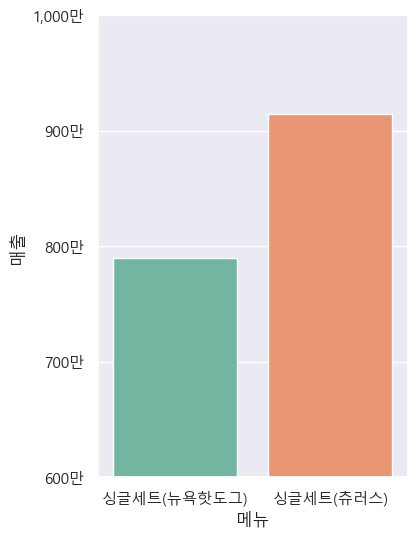

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(4, 6))
sns.barplot(x='메뉴', y='매출', data=df_newss, hue='메뉴', palette='Set2')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}만".format(int(x/1e4))))
ax.set(ylim=(6_000_000, 10_000_000))  # 매출이 큰 범위만 표시
ax.yaxis.set_major_locator(MultipleLocator(1_000_000))

plt.show()

In [61]:
round(9142370 / 7900079, 2) # 16% 매출 상승

1.16

## 인사이트 1

In [28]:
sold = data3.sort_values(by='매출', ascending=False).reset_index(drop=True).drop(columns=['메뉴번호', '가격', '수량'], axis=1)
display(sold.head(3))
display(sold.tail(3))

,메뉴,매출
0,츄러스,38214360
1,캬라멜팝콘(M),37210000
2,캬라멜 팝콘(L),21245667


,메뉴,매출
32,사케,450000
33,뱅쇼(G),280000
34,샤퀴테리 Box (4구),95452


In [29]:
sold3_3 = pd.concat([sold.head(3), sold.tail(3)], ignore_index=True)
sold3_3

,메뉴,매출
0,츄러스,38214360
1,캬라멜팝콘(M),37210000
2,캬라멜 팝콘(L),21245667
3,사케,450000
4,뱅쇼(G),280000
5,샤퀴테리 Box (4구),95452


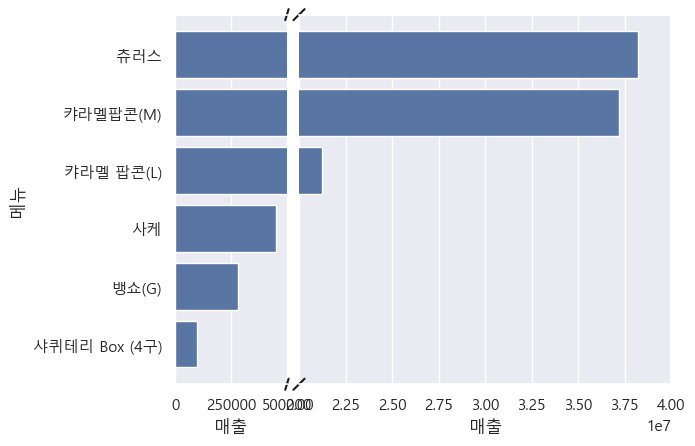

In [31]:
# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [0.3, 1]})
fig.subplots_adjust(wspace=0.05)  # 축 사이의 간격을 줄임

# 좌측 그래프 (매출이 작은 부분)
sns.barplot(x='매출', y='메뉴', data=sold3_3, ax=ax1)
ax1.set(xlim=(0, 500000))  # 매출이 작은 범위만 표시

# 우측 그래프 (매출이 큰 부분)
sns.barplot(x='매출', y='메뉴', data=sold3_3, ax=ax2)
ax2.set(xlim=(20000000, 40000000))  # 매출이 큰 범위만 표시

# 축의 눈금과 눈금표를 조정하여 물결 표시
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.tick_params(axis='y', which='both', left=False, right=False)
ax2.tick_params(axis='y', which='both', left=False, right=False)

d = .015  # 물결표시의 크기 조정
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 좌측 물결표시
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # 우측 물결표시
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

plt.show()

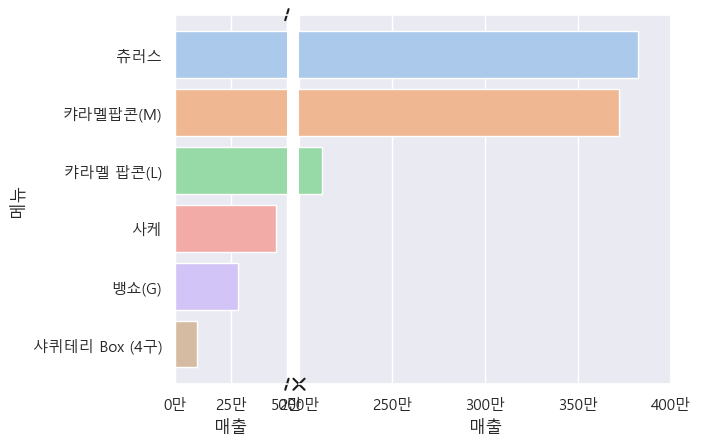

In [32]:
# Seaborn 스타일 및 색상 설정
palette = sns.color_palette("pastel", n_colors=6)  # Seaborn 내장 색상 팔레트

# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [0.3, 1]})
fig.subplots_adjust(wspace=0.05)  # 축 사이의 간격을 줄임

# 좌측 그래프 (매출이 작은 부분)
sns.barplot(x='매출', y='메뉴', data=sold3_3, ax=ax1, hue='메뉴', palette=palette)
ax1.set(xlim=(0, 500000))  # 매출이 작은 범위만 표시
ax1.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}만".format(int(x/1e4))))
# plt.gca().axes.xaxis.set_visible(False)

# 우측 그래프 (매출이 큰 부분)
sns.barplot(x='매출', y='메뉴', data=sold3_3, ax=ax2, hue='메뉴', palette=palette)
ax2.set(xlim=(20000000, 40000000))  # 매출이 큰 범위만 표시
ax2.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}만".format(int(x/1e5))))
ax2.xaxis.set_major_locator(MultipleLocator(5_000_000))

# 축의 눈금과 눈금표를 조정하여 물결 표시
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.tick_params(axis='y', which='both', left=False, right=False)
ax2.tick_params(axis='y', which='both', left=False, right=False)

d = .015  # 물결표시의 크기 조정
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 좌측 물결표시
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)   # 좌측 물결표시

kwargs.update(transform=ax2.transAxes)  # 우측 물결표시
ax2.plot((-d, +d), (d, -d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

plt.show()



## 인사이트4